# Imports

In [156]:
import cv2
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import pickle as pkl
from torchsummary import summary


# Importing randomised data

In [161]:
x = pkl.load(open('x.pkl','rb'))
y = pkl.load(open('y.pkl','rb'))
x = x/255

In [85]:
test_data = x[1]
print(test_data.shape)

torch.Size([100, 100])


In [86]:
test_data.reshape(1,100,100).shape

torch.Size([1, 100, 100])

In [146]:

y.reshape(1,456).shape

torch.Size([1, 456])

# Setting the parameters

In [171]:
learning_rate = 0.001
num_epochs = int(100)
conv1layers = 28
conv2layers = 56
kernel1=5
kernel2 = 5
flat = int(conv2layers * ((((len(x[0])-kernel1+1)/2)-(kernel2-1))/2)*((((len(x[0])-kernel1+1)/2)-(kernel2-1))/2))
hid1 = 300
hid2 = 100
output = 6  


# Model initialising

In [172]:
class NeuralNet(nn.Module):
    def __init__(self, conv1layers, conv2layers,kernel1,kernel2,flat,hid1,hid2,output):
        super(NeuralNet, self).__init__()
        self.conv = nn.Conv2d(1, conv1layers, kernel_size=kernel1)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(conv1layers, conv2layers, kernel_size=kernel2)
        self.pool2 = nn.MaxPool2d(2)
        self.hidden= nn.Linear(flat, hid1)
        self.drop = nn.Dropout(0.2)
        self.hidden2 = nn.Linear(hid1, hid2)
        self.out = nn.Linear(hid2, output)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.act(self.conv(x)) # [batch_size, 28, 96, 96]
        x = self.pool(x) # [batch_size, 28, 48, 48]
        x = self.act(self.conv2(x)) # [batch_size, 56, 44, 44]
        x = self.pool(x)# [batch_size, 56, 22, 22]
        x = x.view(-1,flat) # [batch_size, 56*22*22=27104]
        x = self.act(self.hidden(x))# [batch_size, 128]
        x = self.act(self.hidden2(x)) 
        x = self.drop(x)
        x = self.out(x) # [batch_size, 10]
        return x


# Loss and Optimiser

In [173]:
model = NeuralNet(conv1layers, conv2layers,kernel1,kernel2,flat,hid1,hid2,output)
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)

# Model summary

In [174]:
summary(model, (1,100, 100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 28, 96, 96]             728
              ReLU-2           [-1, 28, 96, 96]               0
         MaxPool2d-3           [-1, 28, 48, 48]               0
            Conv2d-4           [-1, 56, 44, 44]          39,256
              ReLU-5           [-1, 56, 44, 44]               0
         MaxPool2d-6           [-1, 56, 22, 22]               0
            Linear-7                  [-1, 300]       8,131,500
              ReLU-8                  [-1, 300]               0
            Linear-9                  [-1, 100]          30,100
             ReLU-10                  [-1, 100]               0
          Dropout-11                  [-1, 100]               0
           Linear-12                    [-1, 6]             606
Total params: 8,202,190
Trainable params: 8,202,190
Non-trainable params: 0
---------------------------

In [175]:
for epochs in range(num_epochs):
    for i in range(len(x)):
        outputs = model.forward(x[i].reshape(1,100,100))
        loss = criterion(outputs,y[i].reshape(1))

        #backward
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

    print(epochs, ":", loss.item())

0 : 1.7707208395004272
1 : 1.7847192287445068
2 : 1.7791589498519897
3 : 1.7911111116409302
4 : 1.7913271188735962
5 : 1.7844432592391968
6 : 1.7921183109283447
7 : 1.79520845413208
8 : 1.7980763912200928
9 : 1.793704867362976
10 : 1.7876262664794922
11 : 1.7931119203567505
12 : 1.7932331562042236
13 : 1.7742842435836792
14 : 1.7958743572235107
15 : 1.7902929782867432
16 : 1.774454116821289
17 : 1.7840914726257324
18 : 1.7831543684005737
19 : 1.78847074508667
20 : 1.791055679321289
21 : 1.78573477268219
22 : 1.7878117561340332
23 : 1.786870002746582
24 : 1.7855170965194702
25 : 1.7866586446762085
26 : 1.7875447273254395
27 : 1.7870557308197021
28 : 1.7964283227920532
29 : 1.7853400707244873
30 : 1.7854433059692383
31 : 1.7932275533676147
32 : 1.792993187904358
33 : 1.794203519821167
34 : 1.7956064939498901
35 : 1.805087924003601
36 : 1.8011318445205688
37 : 1.796863317489624
38 : 1.7807878255844116
39 : 1.7937997579574585
40 : 1.7890069484710693
41 : 1.7882061004638672
42 : 1.795055627

KeyboardInterrupt: 

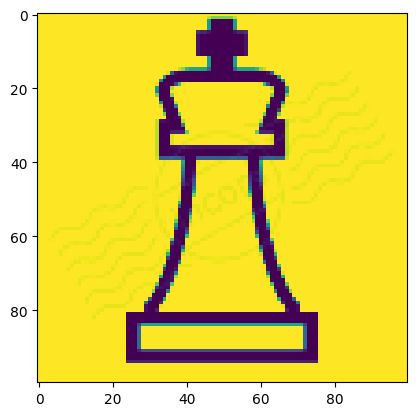

In [181]:
bleh = x[0].reshape(1,100,100)
out = model.forward(bleh)
plt.imshow(x[0])

In [180]:
out

tensor([[0.0087, 0.0005, 0.0210, 0.0111, 0.0149, 0.0042]],
       grad_fn=<AddmmBackward0>)

In [121]:

bleh = bleh.view(-1,10000)
print(bleh.shape)

torch.Size([1, 10000])


In [133]:
model.forward(bleh.reshape(1,100,100)).shape

torch.Size([1, 6])

In [169]:
yn = y[0].reshape(1)
yn


tensor([1])

In [170]:
y[0]

tensor(1)